In [5]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader, random_split
from scipy.signal import butter, filtfilt
from sklearn.model_selection import train_test_split  
import numpy as np
import matplotlib.pyplot as plt
import pickle

print(f"PyTorch version: {torch.__version__}")
print(f"Torchvision version: {torchvision.__version__}")
print(f"Numpy version: {np.__version__}")

PyTorch version: 2.5.1
Torchvision version: 0.20.1
Numpy version: 1.26.4


In [18]:
## Importation des données puis formatage pour l'entrainement

#load data from data.pkl in a tensor
with open('data.pkl', 'rb') as file: #récupération des données
    data = pickle.load(file)

#filtrage des signaux EEG
# Définir les fréquences de coupure et de la fréquence d'échantillonage du signal
low_cutoff = 0.53   #fréquence de coupure basse
high_cutoff = 40    #fréquence de coupure haute
sample_rate = 173.61 #fréquence d'échantillonage

# Conception du filtre passe-bande
nyquist = 0.5 * sample_rate
low = low_cutoff / nyquist
high = high_cutoff / nyquist
b, a = butter(4, [low, high], btype='band')

# Appliquer le filtre passe-bande
filtered_data = filtfilt(b, a, data, axis=1)

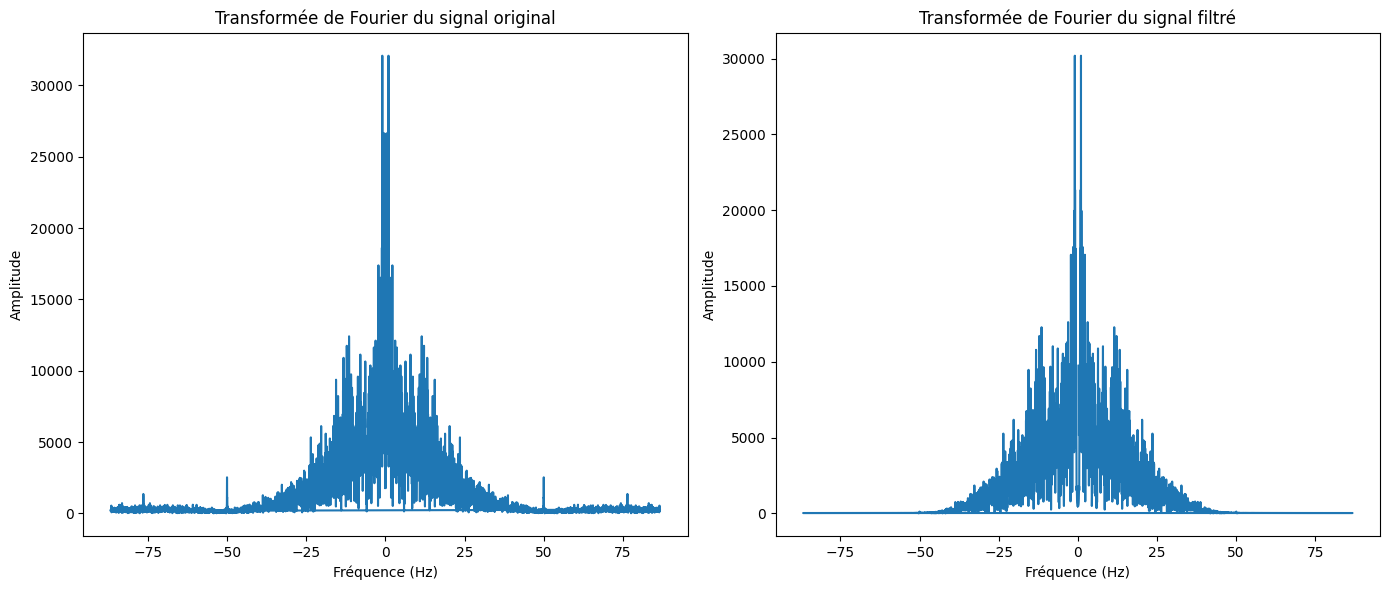

In [15]:
#Comparaison visuelle du signal filtré et original
# Sélectionner un signal aléatoire
random_index = np.random.randint(0, data.shape[0])
original_signal = data[random_index]
filtered_signal = filtered_data[random_index]

# Calculer la transformée de Fourier
original_fft = np.fft.fft(original_signal)
filtered_fft = np.fft.fft(filtered_signal)

# Calculer les fréquences correspondantes
freqs = np.fft.fftfreq(len(original_signal), d=1/sample_rate)

# Afficher les résultats
plt.figure(figsize=(14, 6))

# Transformée de Fourier du signal original
plt.subplot(1, 2, 1)
plt.plot(freqs, np.abs(original_fft))
plt.title('Transformée de Fourier du signal original')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')

# Transformée de Fourier du signal filtré
plt.subplot(1, 2, 2)
plt.plot(freqs, np.abs(filtered_fft))
plt.title('Transformée de Fourier du signal filtré')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [ ]:
#Conversion des données en tenseur
filtered_data = torch.tensor(data)

# Mélanger les lignes  
permuted_indices = torch.randperm(filtered_data.size(0))  # Générer des indices aléatoires  
shuffled_data = filtered_data[permuted_indices]  # Réorganiser les données  

# Diviser le tenseur en ensembles d'entraînement, de validation et de test  
train_size = int(0.8 * len(shuffled_data))  
val_size = int(0.1 * len(shuffled_data))  
test_size = len(shuffled_data) - train_size - val_size  

train_data = shuffled_data[:train_size]  # Ensemble d'entraînement  
val_data = shuffled_data[train_size:train_size + val_size]  # Ensemble de validation  
test_data = shuffled_data[train_size + val_size:]  # Ensemble de test  


print("Ensemble d'entraînement :", train_data.shape)  
print("Ensemble de validation :", val_data.shape)  
print("Ensemble de test :", test_data.shape)

Ensemble d'entraînement : torch.Size([400, 4098])
Ensemble de validation : torch.Size([50, 4098])
Ensemble de test : torch.Size([50, 4098])
